In [1]:
import pandas as pd

In [13]:
data = pd.read_csv('British_Airlines_Reviews.csv',usecols=["Users Reviews"])

In [14]:
data

Users Reviews
0     ✅Trip Verified|  Cancelled our flight last-min...
1     ✅Trip Verified| I had a flight from Miami, Flo...
2     ✅Trip Verified|  We started our day with BA in...
3     ✅Trip Verified|  I fly British Airways weekly ...
4     Not Verified|  Everything was ok until our con...
...                                                 ...
2755  LHR to YVR return. Hard earned Avios points tr...
2756  Club World from LHR-ORD. Busy flight on the ag...
2757  This review refers to a return trip from India...
2758  This review concerns LHR-BOM in Business Class...
2759  Family of 3 - 747 out (upper deck) 777 back. F...

[2760 rows x 1 columns]

In [15]:
print(data.sample(10))

                                          Users Reviews

2264  The British Airways outbound flight from Londo...

958   Not Verified|  Glasgow to Miami via London. Gl...

1766  Bangkok to Manchester via London. I used to fl...

2447  San Francisco to Edinburgh via London with Bri...

360   ✅Trip Verified|  British Airways continues to ...

2105  ✅Verified Review|  Barbados to Gatwick on BA21...

460   ✅Trip Verified|  Dubai to London on 5th Decemb...

2411  Roundtrip with British Airways from Bangkok to...

1993  ✅Verified Review|  I was booked to travel Brit...

2176  Miami to Manchester via London Heathrow with B...


In [16]:
data.tail()

Users Reviews
2755  LHR to YVR return. Hard earned Avios points tr...
2756  Club World from LHR-ORD. Busy flight on the ag...
2757  This review refers to a return trip from India...
2758  This review concerns LHR-BOM in Business Class...
2759  Family of 3 - 747 out (upper deck) 777 back. F...

In [17]:
data['Users Reviews'] = data['Users Reviews'].str.strip('✅Trip Verified|')
data['Users Reviews'] = data['Users Reviews'].str.strip('Not Verified|')
data['Users Reviews'] = data['Users Reviews'].str.strip('❎not verified|')
data['Users Reviews'] = data['Users Reviews'].str.strip('not verified|')
data['Users Reviews'] = data['Users Reviews'].str.strip('✅Verified Review|')
data['Users Reviews'] = data['Users Reviews'].str.strip('Unverified|')

In [18]:
data.sample(10)

Users Reviews
78    I booked our first out of country trip to take...
1460  London to Hong Kong on a very new B777-300ER. ...
1871  Outward flight Kuwait to London was on a refur...
1420  London Heathrow to Stockholm. Newish aircraft,...
742   Johannesburg to London. I booked a seat withou...
1664  Flying British Airways from Paris to London is...
2102  British Airways from London Heathrow to New Yo...
1815  First leg DUS to LHR was Club Europe. While bu...
761   I paid an extra £500 for two Premium economy s...
451   Absolutely appalling experience. British Airwa...

In [19]:
pip install textblob

In [20]:
pip install vaderSentiment



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00 0:00:01









In [21]:
import nltk
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk.probability import FreqDist
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [22]:
stemmings = SnowballStemmer('english')
Lemma = nltk.WordNetLemmatizer()

In [23]:
nltk.download('stopwords')
nltk.download('punkt') ##Download the Punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'have', 'didn', 've', "aren't", 'to', 'some', 'themselves', 'there', 'our', 'any', 'o', 'after', 'be', "couldn't", 'shouldn', 'he', 'few', "isn't", "it's", 'further', 'other', 'herself', 'same', 'i', "mustn't", 'why', 'his', 'y', 'most', 'up', 'but', 'very', 'again', 'theirs', 'isn', "that'll", 'shan', 'ma', 'do', 'because', 'above', 'with', 'whom', 'won', 'more', 'don', 'under', 'these', 'against', 'ours', 'doing', 'all', 'has', 'does', 'who', 'that', 'where', 'having', 'hers', "should've", "don't", 'into', 'yourself', 's', 'is', 'once', 'from', 'now', 'you', 'what', 'between', 'during', 'when', 'been', 'just', 'itself', 'yours', 'a', "shan't", "doesn't", 'him', "weren't", 'each', "hasn't", 'they', 'we', 'for', 'down', 'off', "won't", 'needn', 'should', 'himself', 'm', 'ourselves', 'so', "you'll", 'your', 'own', 'through', 'out', "mightn't", 'weren', 'if', 'while', 'couldn', "hadn't", 'such', 'in', "wasn't", 'wouldn', 'me', 't', 'no', 'my', 'she', "she's", 'was', 'then', "you've", 't

In [25]:
# ## Removing Not or No Word from Stopword list
stop_words.remove('not')
stop_words.remove('no')

In [26]:
print(stop_words)

{'have', 'didn', 've', "aren't", 'to', 'some', 'themselves', 'there', 'our', 'any', 'o', 'after', 'be', "couldn't", 'shouldn', 'he', 'few', "isn't", "it's", 'further', 'other', 'herself', 'same', 'i', "mustn't", 'why', 'his', 'y', 'most', 'up', 'but', 'very', 'again', 'theirs', 'isn', "that'll", 'shan', 'ma', 'do', 'because', 'above', 'with', 'whom', 'won', 'more', 'don', 'under', 'these', 'against', 'ours', 'doing', 'all', 'has', 'does', 'who', 'that', 'where', 'having', 'hers', "should've", "don't", 'into', 'yourself', 's', 'is', 'once', 'from', 'now', 'you', 'what', 'between', 'during', 'when', 'been', 'just', 'itself', 'yours', 'a', "shan't", "doesn't", 'him', "weren't", 'each', "hasn't", 'they', 'we', 'for', 'down', 'off', "won't", 'needn', 'should', 'himself', 'm', 'ourselves', 'so', "you'll", 'your', 'own', 'through', 'out', "mightn't", 'weren', 'if', 'while', 'couldn', "hadn't", 'such', 'in', "wasn't", 'wouldn', 'me', 't', 'my', 'she', "she's", 'was', 'then', "you've", 'the', '

In [27]:
# Check if [not,no] persent or not in my stop words.

if stop_words in ['no','not']:
    print("given word is found")
else:
    print("Your Word is not Present")

Your Word is not Present


In [28]:
data['Users Reviews']=data['Users Reviews'].apply(str.lower)

In [29]:
data.sample(3)

Users Reviews
1919  absolutely dire. they were installing a new ch...
49    horrible airline. does not care about their cu...
823   miami to tel aviv via london. at miami airport...

In [30]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda doc:"".join([x for x in doc if x not in punctuation]))

In [32]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda v: re.sub(',', '', v))

In [33]:
data.sample(10)

Users Reviews
299   i travelled on the 11th april with my baby in ...
1131  i booked my flight with cathay pacific  the ro...
2642  a pleasant trip with british airways as usual ...
1821  a very comfortable flight from london to las v...
2136  chicago to amsterdam via london club world  cl...
700   stockholm to london worst business class fligh...
325   the service was very good the cabin crew were ...
777   london heathrow to bengaluru i found the crew ...
1605  i am 73 years old was scheduled to fly from mo...
1283  los angeles to london heathrow the inflight en...

In [34]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda y: " ".join([j for j in y.split() if j not in stop_words]))

In [37]:
# Removing Digits:
data['Users Reviews'] = data['Users Reviews'].apply(lambda d: re.sub(r'\d','',d))

In [38]:
data.sample(15)

Users Reviews
780   london seattle seat upper deck nice perk seatt...
1379  flight budapest london delayed  hours time bri...
491   paris london flight cancelled due “atc restric...
2426  ark heathrow british airways disappointed paid...
398   checkin slow no app checkin could not check va...
2546  british airways heathrow vancouver outbound to...
1797  hong kong london seats k j one worst journeys ...
2000  outbound heathrow frankfurt ancient british ai...
1093  decided go club europe relatively short flight...
1011  london tehran back august  cabin looked old ti...
655   stress free journey  yr old autistic son  yr o...
2698  overall journey good breakfast okay served san...
310   low standards club europe no cabin divider air...
1015  johannesburg heathrow british airways not us p...
1823  heathrow houston british airways worst travel ...

In [39]:
nltk.download("wordnet") ## WordNet Lemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [40]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda x: [Lemma.lemmatize(word) for word in word_tokenize(x)])

In [41]:
data.sample(10)

Users Reviews
1822  [booked, bought, online, ticket, multi, destin...
2632  [poor, flight, broken, seat, toilet, stuck, to...
1322  [london, heathrow, hong, kong, really, mixed, ...
311   [flight, not, affected, recent, problem, ba, q...
2388  [london, heathrow, edinburgh, return, checked,...
1981  [berlin, txl, london, heathrow, british, airwa...
976   [london, dublin, early, morning, departure, he...
1326  [dubai, london, regular, ba, flyer, generally,...
1242  [london, heathrow, brussels, travel, surgery, ...
1247  [london, bahrain, club, world, certainly, like...

In [42]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda x: [w for w in x if len(w) > 2])

In [43]:
data.sample(10)

Users Reviews
1995  [flew, london, heathrow, washington, business,...
919   [abu, dhabi, london, although, flight, sector,...
2664  [quick, online, checkin, boarding, pass, mobil...
1360  [johannesburg, london, heathrow, premium, econ...
1620  [edinburgh, luanda, via, heathrow, british, ai...
1571  [excellent, experience, roundtrip, trip, hong,...
2335  [flew, lgwbcn, seated, seat, lounge, gatwick, ...
2240  [seattle, tel, aviv, via, london, british, air...
23    [month, passed, still, wasting, time, team, sh...
957   [hamburg, london, initial, flight, london, can...

# Find Frequency of Words 
**how many times has he come**

In [44]:
freq_dist = FreqDist()

In [45]:
df = data.copy()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def create_freq_dist(text):
    return FreqDist(text)

df['Users Reviews'] = df['Users Reviews'].apply(lambda x: create_freq_dist(x))

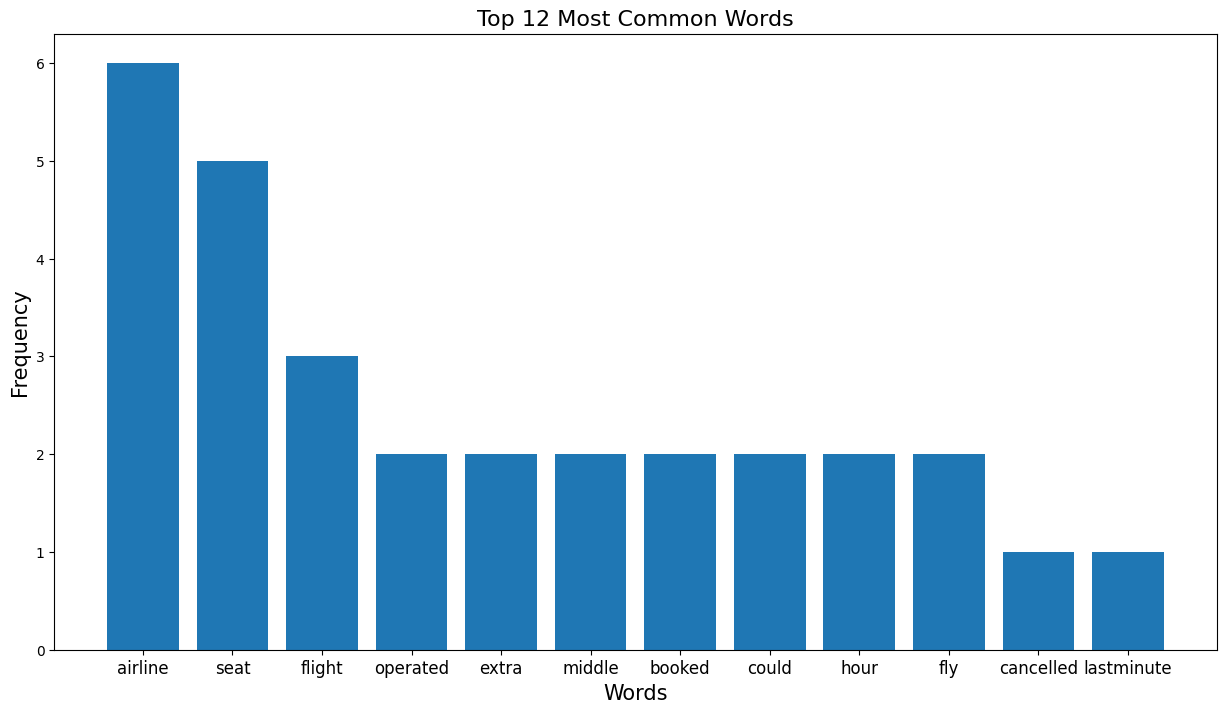

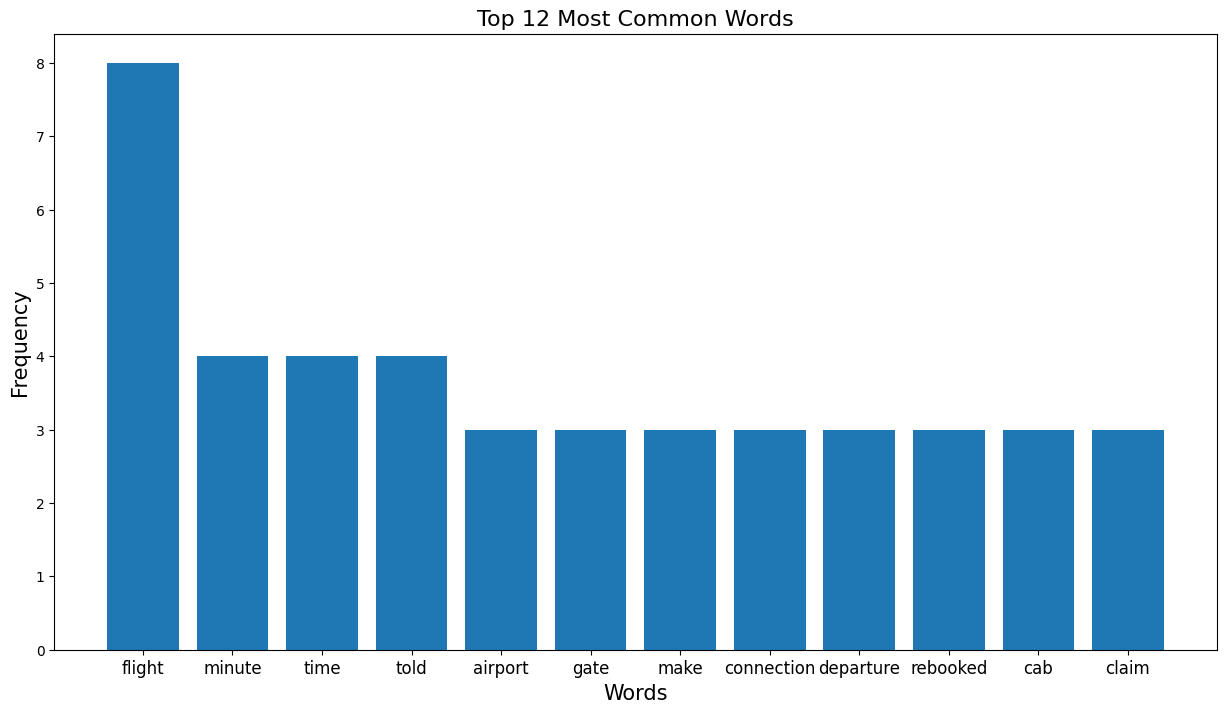

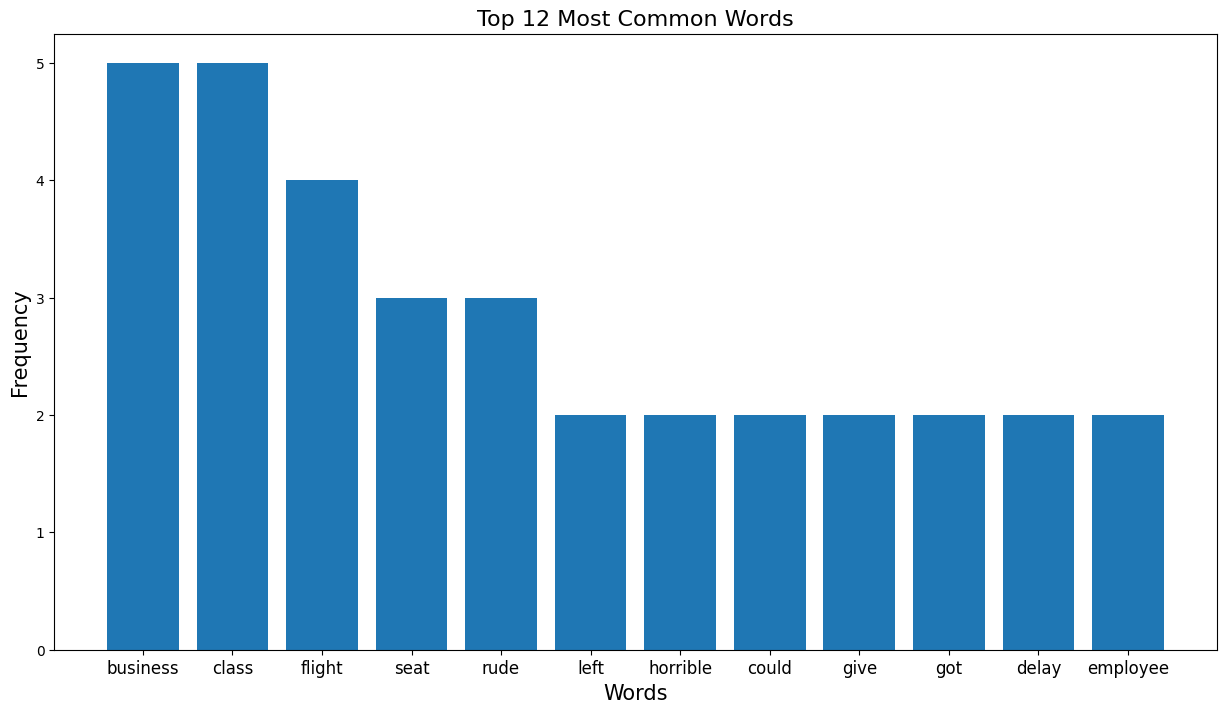

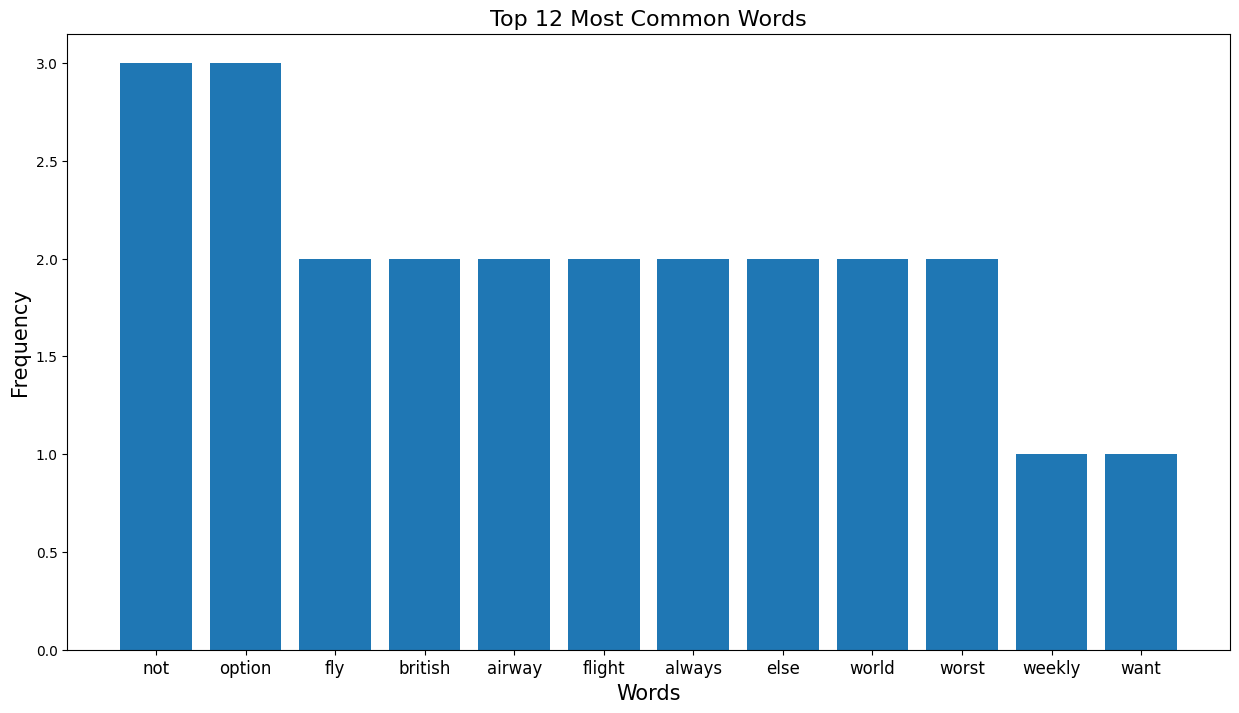

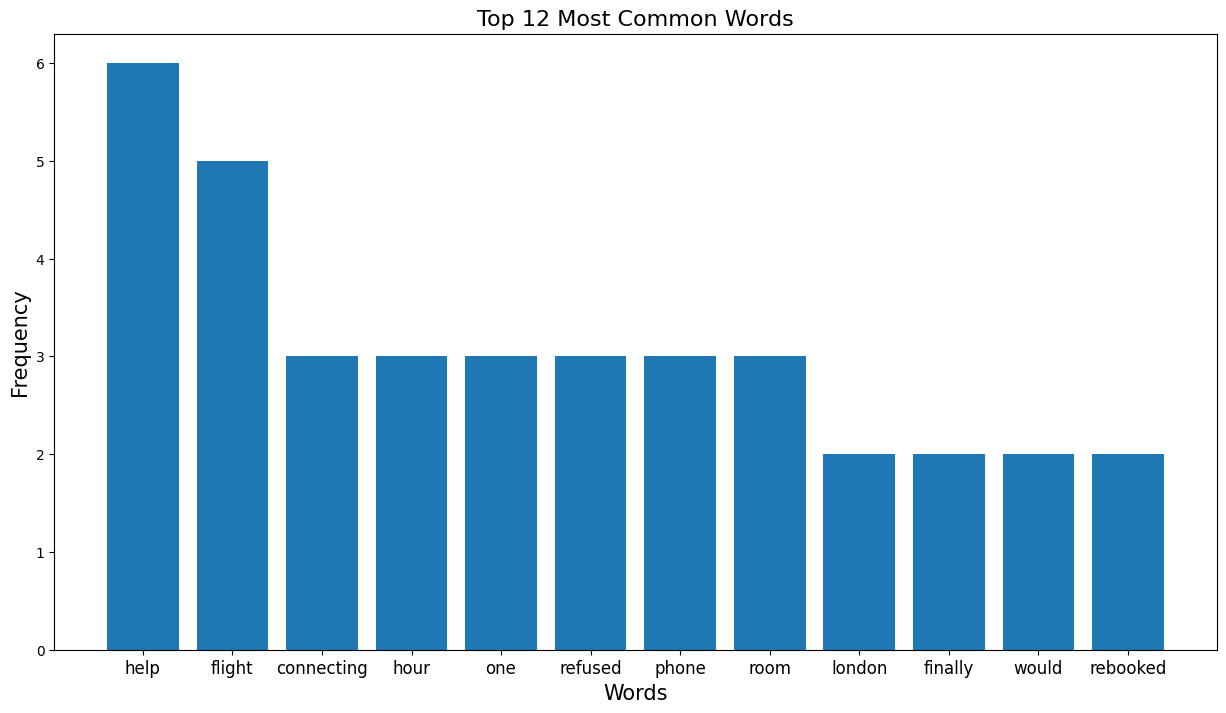

In [48]:
# Function to plot the most common words from a FreqDist
def plot_freq_dist(freq_Distribution, num_words=12):
    common_words = freq_Distribution.most_common(num_words)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(15, 8))
    plt.bar(words, frequencies)
    plt.xlabel('Words',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)
    plt.title('Top {} Most Common Words'.format(num_words),fontsize=16)
    plt.show()


for index, row in df.head(5).iterrows():#In Python, the iterrows() method is a function provided by the pandas library.
#  #It is used to iterate over DataFrame rows as (index, Series) pairs. Here's a brief explanation of how it works:
  plot_freq_dist(row['Users Reviews'])

In [ ]:
data['Users Reviews'] = data['Users Reviews'].apply(lambda txt: ' '.join(txt))

In [ ]:
data.sample(10)

Users Reviews
1112  gatwick madeira flight left time arrived early...
2162  recent holiday usa excited flying new first ti...
1462  london heathrow vancouver disappointed gradual...
138   horrified extremely small seat poor training c...
1136  flew british airway heathrow hong kong club wo...
1859  flight london boston okay disappointed able si...
1659  tale two airline individual approach business ...
1363  athens london british airway call business cla...
1587  london heathrow munich return used enjoyable e...
761   paid extra two premium economy seat long haul ...

# Find Subjectivity_Score

In [ ]:
def get_Subjectivity(text):
  Subjectivity_s = TextBlob(str(text))
  return Subjectivity_s.sentiment.subjectivity


data['Subjectivity_Score'] = data['Users Reviews'].apply(lambda x: get_Subjectivity(x))

In [ ]:
data

Users Reviews  Subjectivity_Score
0     cancelled flight lastminute moved onto flight ...            0.420000
1     flight miami florida dublin ireland via london...            0.446667
2     started day prague flight actually left time c...            0.540476
3     fly british airway weekly not want route there...            0.587302
4     everything connecting flight london take runwa...            0.590675
...                                                 ...                 ...
2755  lhr yvr return hard earned avios point trip ye...            0.523851
2756  club world lhrord busy flight ageing seat comf...            0.489583
2757  review refers return trip india bomlhr premium...            0.425000
2758  review concern lhrbom business class not fan b...            0.712500
2759  family upper deck back fortunate silver member...            0.416330

[2760 rows x 2 columns]

## **Subjectivity_Score**

---
This Subjectivity Score is shows that how many reviewers Contain **Personal Opinion.**
---
Subjectivity Score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information.

In [ ]:
## Creating a Object vader
vader_score = SentimentIntensityAnalyzer()

In [ ]:
data['Compound_Score'] = [vader_score.polarity_scores(m)['compound'] for m in data['Users Reviews']]

In [ ]:
data.head()

Users Reviews  Subjectivity_Score  \
0  cancelled flight lastminute moved onto flight ...            0.420000   
1  flight miami florida dublin ireland via london...            0.446667   
2  started day prague flight actually left time c...            0.540476   
3  fly british airway weekly not want route there...            0.587302   
4  everything connecting flight london take runwa...            0.590675   

   Compound_Score  
0          0.5106  
1         -0.6011  
2         -0.9452  
3         -0.9210  
4         -0.9035

## **Compound_Score:**
---
**The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).**

In [ ]:
def Results(text):
  over_all = vader_score.polarity_scores(text)
  if over_all['compound'] >=0.05:
    return "Positive"
  elif over_all['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"


data['Overall Sentiment'] = data['Users Reviews'].apply(Results)

In [ ]:
print(data)

                                          Users Reviews  Subjectivity_Score  \

0     cancelled flight lastminute moved onto flight ...            0.420000   

1     flight miami florida dublin ireland via london...            0.446667   

2     started day prague flight actually left time c...            0.540476   

3     fly british airway weekly not want route there...            0.587302   

4     everything connecting flight london take runwa...            0.590675   

...                                                 ...                 ...   

2755  lhr yvr return hard earned avios point trip ye...            0.523851   

2756  club world lhrord busy flight ageing seat comf...            0.489583   

2757  review refers return trip india bomlhr premium...            0.425000   

2758  review concern lhrbom business class not fan b...            0.712500   

2759  family upper deck back fortunate silver member...            0.416330   



      Compound_Score Overall Sentiment

Find Ov

In [ ]:
data['Overall Sentiment'].value_counts().to_frame(name="OVERALL SENTIMENT")

OVERALL SENTIMENT
Positive               1664
Negative               1040
Neutral                  56

In [ ]:
data['Overall Sentiment'].value_counts()

Positive    1664
Negative    1040
Neutral       56
Name: Overall Sentiment, dtype: int64

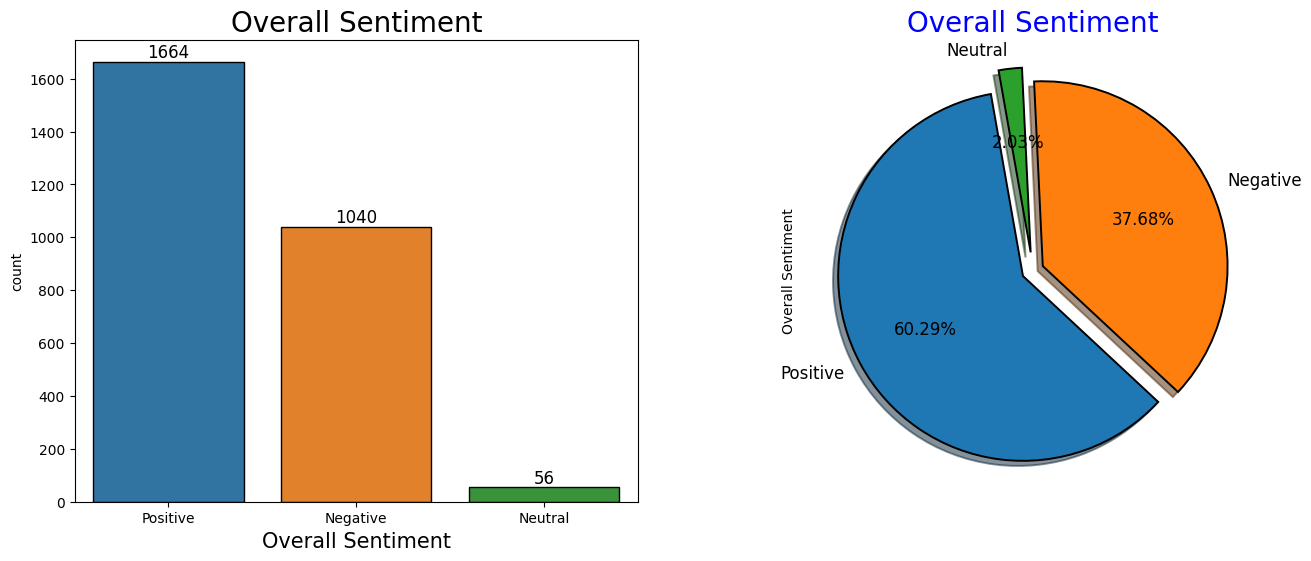

In [ ]:
plt.figure(figsize=(16, 6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Overall Sentiment', data=data,edgecolor="black")
ax.bar_label(ax.containers[0],fontsize=12)
plt.title("Overall Sentiment", fontsize=20)
plt.xlabel('Overall Sentiment',fontsize=15)


ax = plt.subplot(1,2,2)
wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1.4}
ax=data['Overall Sentiment'].value_counts().plot.pie(explode=[0.06, 0.06, 0.1],autopct='%1.2f%%',wedgeprops=wedgeprops,startangle=100,textprops={'color': 'black','fontsize':12},shadow=True);
ax.set_title(label = "Overall Sentiment", fontsize = 20,color='blue');


***60.29%*** of the Reviews Sentiment is **Positive** and ***37.68%*** Sentiment is **Negative.** We can say that the sentiment of maximum people is **Positive.**

# **WordCloud:**


A **WordCloud** is a simple, weighted visual representation of the vocabulary contained in a textual dataset that allows us to estimate the contents of the data at a glance. ***It contains the most frequently occurring words in the data, with more frequent words appearing larger in size than less frequent ones.***

**Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
text = " ".join([j for j in data['Users Reviews']])

In [1]:
# print(text)

In [ ]:
WC = WordCloud(background_color="white",contour_width = 2,
               contour_color = 'black',colormap = 'BuPu_r',
               max_words=500,max_font_size=150,width = 800, height = 500).generate(text)

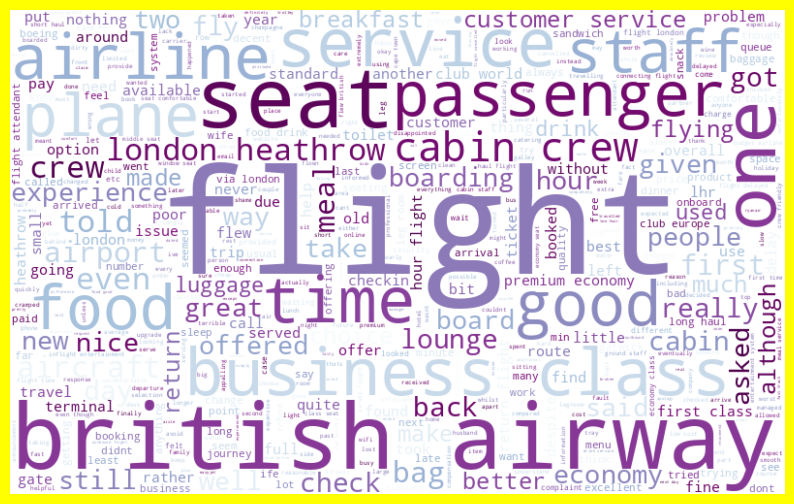

In [ ]:
plt.figure(figsize=(10,8),facecolor="yellow")
plt.axis("off")
plt.imshow(WC,interpolation="bilinear")

In [ ]:
Word_C = WordCloud(background_color="black",contour_width = 2,colormap = 'BuPu_r',
               max_words=1000,max_font_size=150,width = 800, height = 500).generate(text)

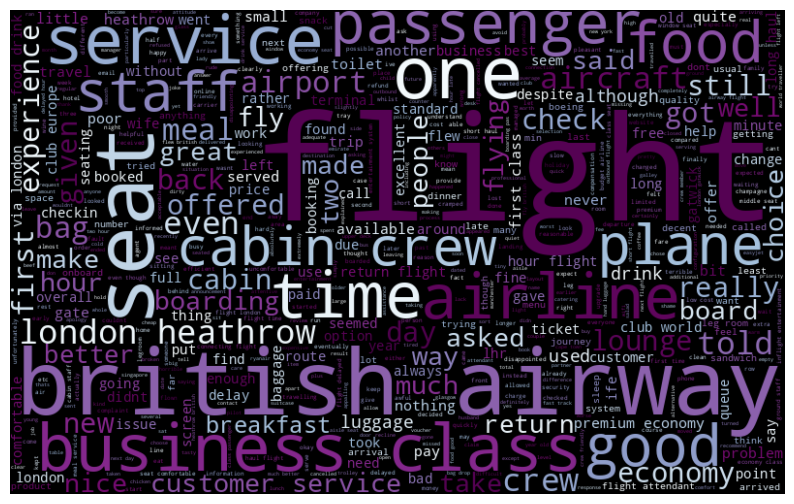

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(Word_C,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Filter the data for positive sentiment
positive_words = data[data['Overall Sentiment'] == 'Positive']['Users Reviews'].str.cat(sep=' ')

In [2]:
# print(positive_words)

In [ ]:
Pos_Cloud = WordCloud(background_color="black",contour_width = 2,colormap = 'BuPu_r',
               max_words=500,max_font_size=150,width = 800, height = 500).generate(positive_words)

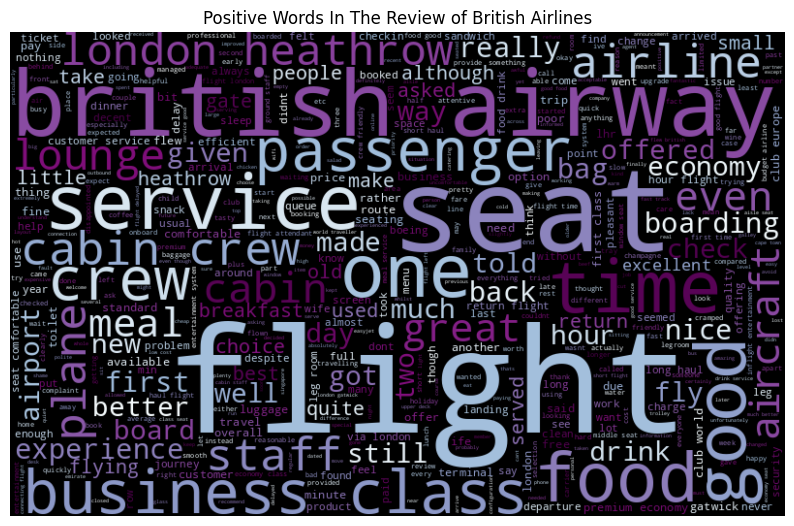

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(Pos_Cloud,interpolation="bilinear")
plt.title("Positive Words In The Review of British Airlines")
plt.axis("off")
plt.show()

In [ ]:
TH_word = data[data['Overall Sentiment'] == 'Positive']['Users Reviews'].str.cat(sep=' ')

In [ ]:
Word_CLod = WordCloud(background_color = "white",contour_width = 2,contour_color = 'black',colormap = 'BuPu',mode="RGB",max_words=5000,max_font_size=150,width = 800, height = 500).generate(TH_word)

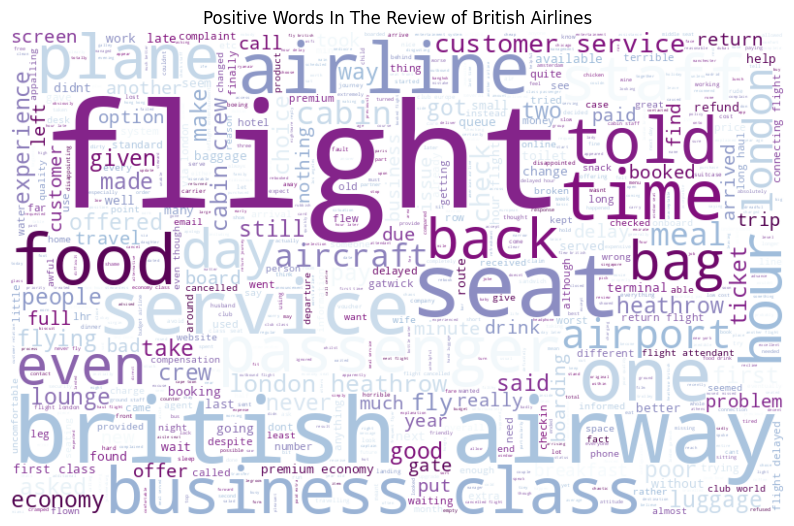

In [ ]:
plt.figure(figsize=(10,9))
plt.imshow(Word_CLod,interpolation='bilinear')
plt.title("Positive Words In The Review of British Airlines")
plt.axis("off")
plt.show()

In [ ]:
Ne_word = data[data['Overall Sentiment'] == 'Negative']['Users Reviews'].str.cat(sep=' ')

In [ ]:
Word_CL = WordCloud(background_color = "white",contour_width = 2,contour_color = 'yellow',colormap = 'Accent',mode="RGB",max_words=1000,max_font_size=150,width = 800, height = 500).generate(Ne_word)

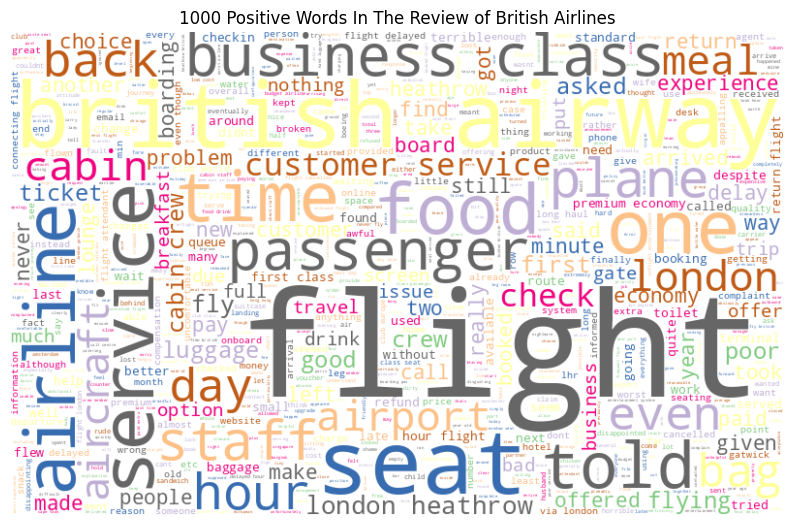

In [ ]:
plt.figure(figsize=(10,9))
plt.imshow(Word_CL,interpolation='bilinear')
plt.title("1000 Positive Words In The Review of British Airlines")
plt.axis("off")
plt.show()

In [ ]:
Negative_word = data[data['Overall Sentiment'] == 'Negative']['Users Reviews'].str.cat(sep=' ')


Word_CLOUDS = WordCloud(background_color = "black",contour_width = 2,contour_color = 'yellow',colormap = 'YlOrRd',mode="RGB",max_words=4000,max_font_size=150,width = 800, height = 500).generate(Negative_word)

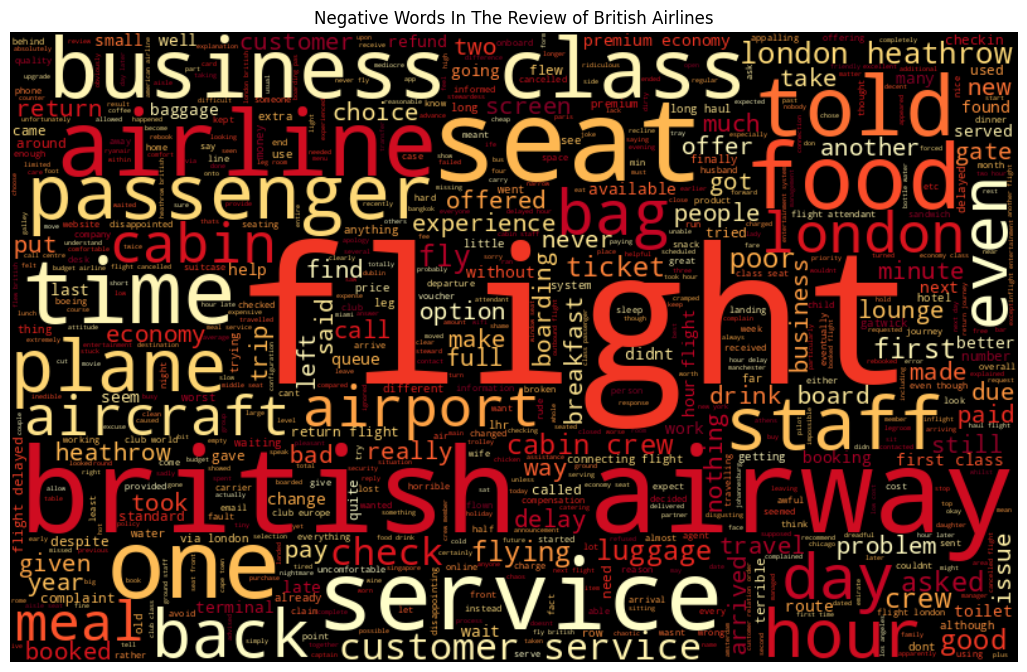

In [ ]:
plt.figure(figsize=(13,9))
plt.imshow(Word_CLOUDS,interpolation='bilinear')
plt.title("Negative Words In The Review of British Airlines")
plt.axis("off")
plt.show()

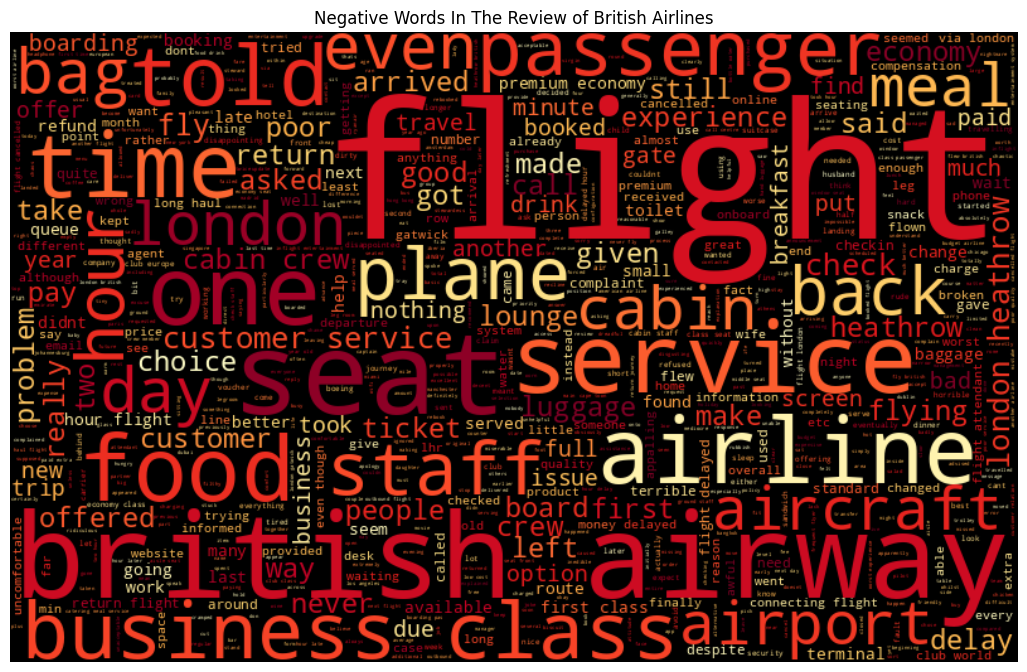

In [ ]:
Negative_words = data[data['Overall Sentiment'] == 'Negative']['Users Reviews'].str.cat(sep=' ')


Word_CLOUDS_Text = WordCloud(background_color = "black",contour_width = 2,contour_color = 'yellow',colormap = 'YlOrRd',mode="RGB",max_words=20000,max_font_size=150,width = 800, height = 500).generate(Negative_words)



plt.figure(figsize=(13,9))
plt.imshow(Word_CLOUDS_Text,interpolation='bilinear')
plt.title("Negative Words In The Review of British Airlines")
plt.axis("off")
plt.show()

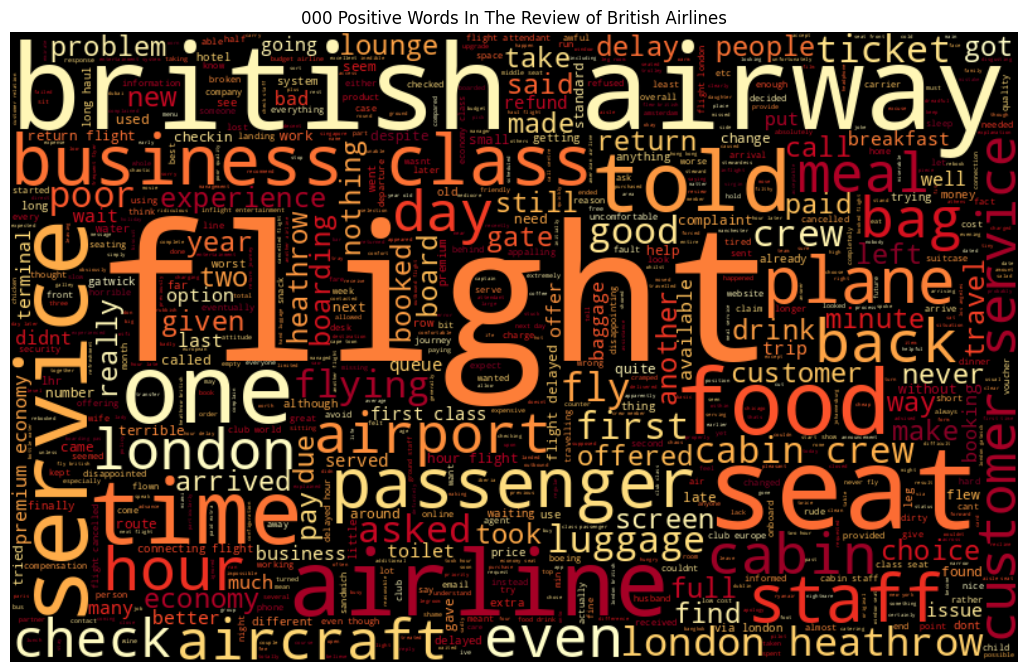

In [ ]:
we = data[data['Overall Sentiment'] == 'Negative']['Users Reviews'].str.cat(sep=' ')


Wo = WordCloud(background_color = "black",contour_width = 2,contour_color = 'yellow',colormap = 'YlOrRd',mode="RGB",max_words=100000,max_font_size=150,width = 800, height = 500).generate(we)



plt.figure(figsize=(13,9))
plt.imshow(Wo,interpolation='bilinear')
plt.title("000 Positive Words In The Review of British Airlines")
plt.axis("off")
plt.show()

In [ ]:
data['Overall Sentiment'].value_counts().to_frame(name="OVER_ALL SENTIMENT")

OVER_ALL SENTIMENT
Positive                1664
Negative                1040
Neutral                   56

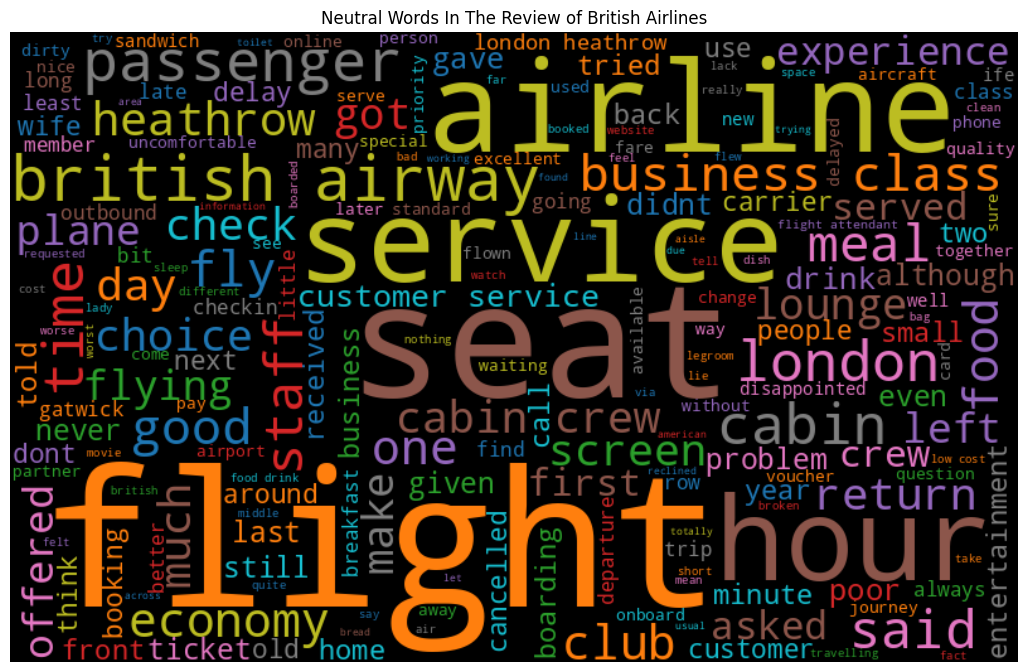

In [ ]:
Neu = data[data['Overall Sentiment'] == 'Neutral']['Users Reviews'].str.cat(sep=' ')


store = WordCloud(background_color = "black",contour_width = 2,contour_color = 'yellow',colormap = 'tab10',mode="RGB",max_font_size=150,width = 800, height = 500).generate(Neu)

plt.figure(figsize=(13,9))
plt.imshow(store,interpolation='bilinear')
plt.title("Neutral Words In The Review of British Airlines")
plt.axis("off")
plt.show()